In [20]:
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



In [21]:
reviews_df = pd.read_csv("Amazon_Reviews.csv")
reviews_df

,Review,Label
0,Stuning even for the non-gamer: This sound tr...,1
1,The best soundtrack ever to anything.: I'm re...,1
2,Amazing!: This soundtrack is my favorite musi...,1
3,Excellent Soundtrack: I truly like this sound...,1
4,"Remember, Pull Your Jaw Off The Floor After H...",1
...,...,...
194,A Book That Is Worth a Second Look: This book...,1
195,Best game ever: This games makes even amazing...,1
196,Guitar in Absentia: With all due respect to a...,0
197,Stiff and Smells like drying paint: You get w...,0


In [22]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  199 non-null    object
 1   Label   199 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.2+ KB


In [23]:
y = reviews_df['Label']
reviews_df.drop("Label",axis = 1,inplace = True)

In [24]:
reviews_df

,Review
0,Stuning even for the non-gamer: This sound tr...
1,The best soundtrack ever to anything.: I'm re...
2,Amazing!: This soundtrack is my favorite musi...
3,Excellent Soundtrack: I truly like this sound...
4,"Remember, Pull Your Jaw Off The Floor After H..."
...,...
194,A Book That Is Worth a Second Look: This book...
195,Best game ever: This games makes even amazing...
196,Guitar in Absentia: With all due respect to a...
197,Stiff and Smells like drying paint: You get w...


In [25]:
regex_tokenizer=RegexpTokenizer(r'\w+')

lemmatizer=WordNetLemmatizer()

#stemmer=PorterStemmer()

tdidf=TfidfVectorizer()

stopwords_en=stopwords.words('english')

In [26]:
lemmatizer.lemmatize('playing',pos = 'v')

'play'

In [27]:
stopwords_en

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [28]:
def preprocessing(text):
    
    tokens=regex_tokenizer.tokenize(text)
    
    pure_tokens=[token.lower() for token in tokens if token.lower() not in stopwords_en]
    
    lemmatized_tokens=[lemmatizer.lemmatize(pure_token,pos = 'v') for pure_token in pure_tokens]
    
    return ' '.join(lemmatized_tokens)
    
preprocessing('This is the last movie i will be watching')
    
    

'last movie watch'

In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(reviews_df,y,test_size = 0.2,random_state = 42)

In [30]:
X_train['cleaned_text']= X_train['Review'].apply(preprocessing)
X_test['cleaned_text']= X_test['Review'].apply(preprocessing)

In [31]:
Xtrain_tfidf_matrix=tdidf.fit_transform(X_train['cleaned_text'])

Xtest_tfidf_matrix=tdidf.transform(X_test['cleaned_text'])

In [32]:
Xtrain_tfidf_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
from sklearn.naive_bayes import MultinomialNB #GaussianNB,BernoulliNB

mnb=MultinomialNB()

mnb.fit(Xtrain_tfidf_matrix.toarray(),Y_train)

predictions=mnb.predict(Xtest_tfidf_matrix.toarray())

predictions

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0])

In [34]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score


print(confusion_matrix(Y_test,predictions))

print(precision_score(Y_test,predictions)*100)

print(recall_score(Y_test,predictions)*100)

print(f1_score(Y_test,predictions)*100)

[[ 9  6]
 [ 2 23]]
79.3103448275862
92.0
85.18518518518519


Text(0.5, 1.0, 'Confusion_matrix')

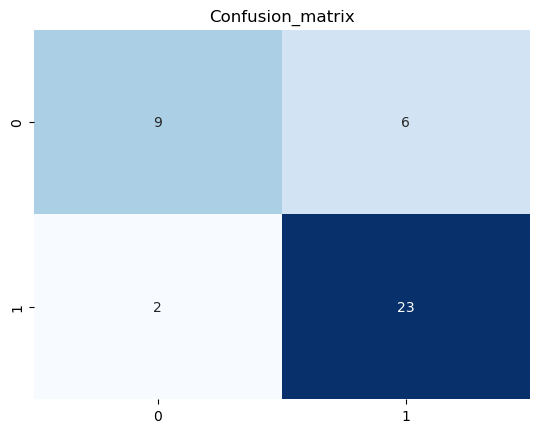

In [37]:
cm = confusion_matrix(Y_test,predictions )
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion_matrix")